# Convolution in 2D and Image Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.patches as patches

import tensorflow.keras.datasets as datasets
import tensorflow.keras.layers as layers

In [3]:
# Load the data

dataset = datasets.mnist.load_data()

(x_train, y_train), (x_test, y_test) = dataset
x_train = x_train / 255.
x_test = x_test / 255.

# Choose a kernel and image

Pick the image from the training data of MNIST.

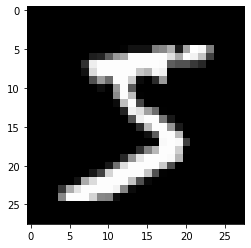

In [5]:
x = x_train[0]

pl.imshow(x, cmap='gray');

Choose the kernel to be a 5x5 patch of the image.

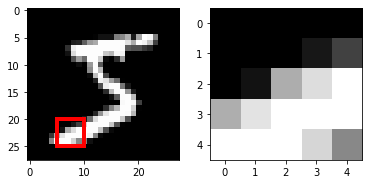

In [10]:
(c0, c1), (r0, r1) = (5, 10), (20, 25)
kernel = x[r0:r1, c0:c1]

pl.subplot(1, 2, 1)
pl.imshow(x, cmap='gray')
ax = pl.gca()
ax.add_patch(patches.Rectangle((c0, r0), c1-c0, r1-r0,
                               facecolor='none',
                              edgecolor='red', linewidth=4))
pl.subplot(1,2,2)
pl.imshow(kernel, cmap='gray');

# Implement conv2d as a nested loop.

In [13]:
def conv2d(image, kernel):
    (wi, hi) = image.shape
    (wk, hk) = kernel.shape
    (wc, hc) = (wi-wk+1, hi-hk+1)
    conv = np.zeros((wc, hc))
    for i in range(wc):
        for j in range(hc):
            region = image[i:i+wk, j:j+hk]
            conv[i,j] = np.sum(region * kernel)
    return conv

Let's apply the kernel to the digit image.

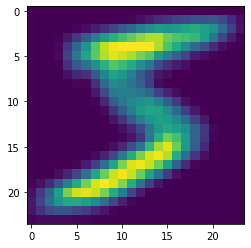

In [23]:
result = conv2d(x, kernel)

pl.imshow(result);

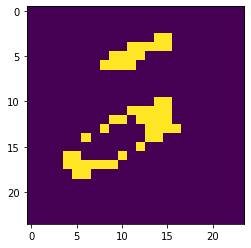

In [31]:
#
# Let's find the kernel in other images
#
z = x_train[5]
pl.imshow(conv2d(z, kernel) > 8)

# Learn how to use Keras Conv2D Layer

Construct a Conv2D layer.

- Use a single filter (aka kernel)
- Kernel shape is (5x5)

In [32]:
conv2d = layers.Conv2D(filters=1, kernel_size=kernel.shape)

In [36]:
y = conv2d(x.reshape(1, 28, 28, 1))
y.shape

TensorShape([1, 24, 24, 1])

In [37]:
#
# Conv2D comes with two parameters
#
p1, p2 = conv2d.get_weights()
print("p1.shape", p1.shape)
print("p2.shape", p2.shape)

p1.shape (5, 5, 1, 1)
p2.shape (1,)


Set the Conv2D layer parameter to our own kernel.

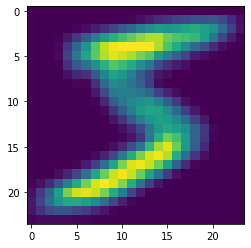

In [43]:
conv2d.set_weights([kernel.reshape(5,5,1,1), np.array([0])])

output = conv2d(x.reshape(1, 28, 28, 1))
output = output.numpy().squeeze()

pl.imshow(output)

# 

In [6]:
import tensorflow.keras as keras
import pydot

In [7]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(4,)),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
